***

<h1><center><u>Problema 2: KRLS </u></center></h1>

KRLS es una versión no lineal del algoritmo de mínimos cuadrados recursivo. El algoritmo KRLS realiza una regresión lineal en un espacio de características de alta dimensionalidad inducido por un kernel, y puede ser usado para construir recursivamente un regresor de mínimo MSE. En esta tarea se pide predecir la serie de tiempo de Mackey-Glass. Esta serie de tiempo puede generarse mediante integración numérica de la siguiente ecuación diferencial 

$$
\frac{dy}{dt} = \frac{a y(t-\tau)}{1 + y(t-\tau)^{10}} -b y(t),
$$

donde se considerará $a=0.2$ y $b=0.1$. El parámetro $\tau$ controla el comportamiento dinámico de la serie de tiempo. Para $\tau > 16.8$ la dinámica se vuelve caótica. En particular se considerarán los valores $\tau = 17$ y $\tau = 30$ para definir comportamientos débilmente caótico y fuertemente caótico, respectivamente. 

Para entrenar el regresor minimice el error de predicción de 1 punto usando los siguientes ejemplos de entrenamiento: $\{(x_i , y_i )\}_{i=1}^N$ con $x_i = (y_{i-m},y_{i-2 m},\ldots,y_{i-d m})$, donde N es el número de ejemplos de entrenamiento, $d$ es la dimensión del embedding y $m$ es el retardo del embedding. Para esta tarea use $m=1$ y $d=7$, para generar conjuntos de entrenamiento y prueba de 3000 y 1000 muestras, respectivamente. 

Se le llama diccionario al conjunto de muestras que forman el conocimiento aprendido por el regresor. En esta tarea, sólo muestras cuyo vector de características no pueda aproximarse por muestras anteriores serán admitidas al diccionario. El criterio usado para evaluar una nueva muestra $x_t$ es la condición de dependencia lineal (ALD por su sigla en ingles) definida como
$$
\delta_t = \min_{\vec a} \left\| \sum_{j=1}^{m_t} a_j \phi (x_j) -\phi(x_t) \right\|^2 < \nu,
$$
donde $\nu$ es el nivel de dispersión (sparsification level). Si existe un set de coeficientes $\vec a$ tal que $\delta_t < \nu$ (se cumple la condición ALD) entonces la muestra $x_t$ no se añade al diccionario. En esta tarea usted usará el algoritmo ALD-KRLS para entrenar predictores de un punto. Considere un kernel Gaussiano para KRLS y un tamaño de diccionario de 100. Las actividades a realizar se detallan a continuación.


1. Utilice el algoritmo ALD-RLS (lineal) para entrenar un predictor de 1 punto que sea óptimo en el sentido de mínimos cuadrados. Considere un valor $\tau=17$ (comportamiento débilmente caótico) para la función generadora. Explore la influencia del nivel de dispersión ($\nu$). Encuentre el mejor valor para el parámetro $\nu$, es decir aquel que minimiza el MSE de predicción. Considere los siguientes valores de $\nu = \{10^{-6}, 10^{-4}, 10^{-2}, 1\}$, para iniciar su búsqueda (se espera que usted realice una búsqueda más fina en los rangos que considere adecuados). Considere los mejores resultados obtenidos como referencia para su análisis en los puntos siguientes.

1. Utilice el algoritmo ALD-KRLS (no lineal) para entrenar un predictor de 1 punto que sea óptimo en el sentido de mínimos cuadrados. Considere un valor $\tau=17$ para la función generadora. Explore la influencia del nivel de dispersión ($\nu$) y del ancho de banda del kernel Gaussiano ($\sigma$). Encuentre la mejor combinación de los parámetros $\nu$ y $\sigma$, es decir aquella que minimiza el MSE de predicción. Considere las combinaciones dadas por $\sigma = \{10^{-2}, 10^{-1}, 1, 10, 100\}$ y $\nu = \{10^{-6}, 10^{-4}, 10^{-2}, 1\}$ para iniciar su búsqueda.  Compare con los resultados obtenidos en el punto anterior.

1. Explique las relaciones entre $\nu$, $\sigma$, el tamaño de diccionario y la capacidad de generalización del regresor. ¿Por qué es importante una solución dispersa (sparse) cuando se entrena un regresor? Mencione las dos ventajas claves de una solución dispersa. ¿Qué ventajas tiene un regresor no lineal basado en funciones de kernel sobre un regresor lineal? 

1. Repita el análisis realizado (sólo KRLS) hasta ahora considerando un valor $\tau=30$ (comportamiento fuertemente caótico) en la función generadora. Repita el punto 2 utilizando el nuevo valor de $\tau$. Compare con los resultados obtenidos usando $\tau=17$ y comente respecto a las diferencias encontradas.

# Actividad práctica: Predicción de series de tiempo

En esta tarea se pide entrenar y evaluar un predictor para la serie de tiempo Mackey-Glass. Esta serie de tiempo puede generarse mediante integración numérica a partir de la siguiente ecuación diferencial

$$
\frac{dy}{dt} = 0.2 \frac{ y(t-\tau)}{1 + y(t-\tau)^{10}} - 0.1 y(t),
$$

el parámetro $\tau$ controla el comportamiento dinámico de la serie de tiempo. Usted debe realizar sus pruebas considerando $\tau = 17$ y $\tau = 30$, que corresponde a comportamientos debilmente caótico y fuertemente caótico, respectivamente

Para entrenar el regresor minimice el error de predicción de 1 punto usando los siguientes ejemplos de entrenamiento: $\{(x_i , y_i )\}_{i=1}^N$ con $x_i = (y_{i-m},y_{i-2 m},\ldots,y_{i-d m})$, donde N es el número de ejemplos de entrenamiento, $d$ es la dimensión del embedding y $m$ es el retardo del embedding. Para esta tarea use $m=1$ y $d=7$, para generar conjuntos de entrenamiento y prueba de 3000 y 1000 muestras, respectivamente. 

In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pylab as plt

<IPython.core.display.Javascript object>


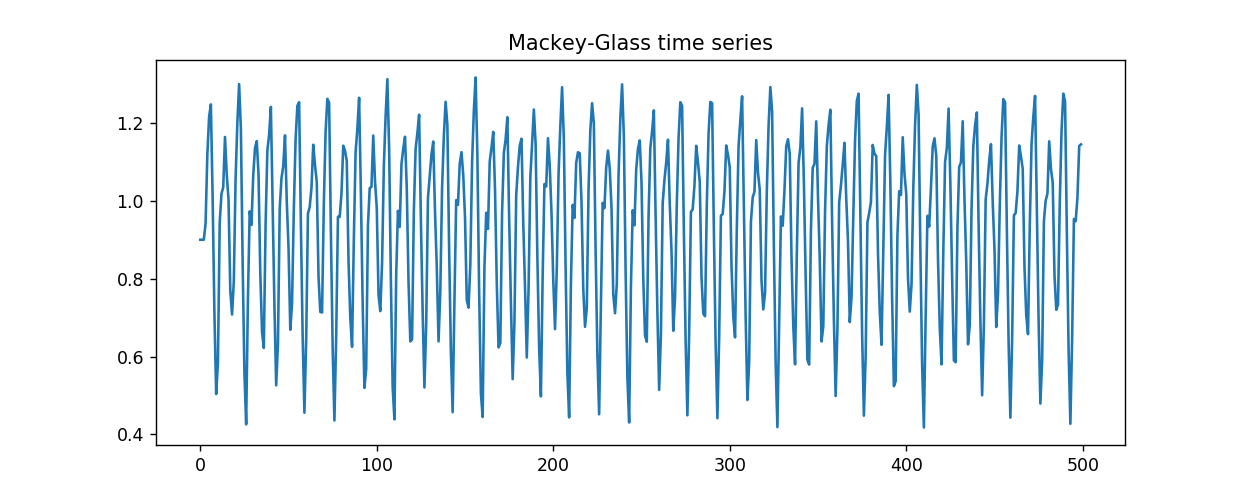

Text(0.5, 1.0, 'Mackey-Glass time series')

In [3]:
# número de observaciones
N = 5000
# constantes de la ecuación diferencial
a, b = 0.1, 0.2
# comportamiento dinámico de Mackey-Glass
tau = 17.
# paso de integración
dt = 0.05
x0 = 0.9
tt = 6

N_full = int(N*tt/dt)
tau_full = int(tau/dt)
xmg = x0*np.ones(shape=(N_full+1, ))
# Runge-Kutta integration
for n in range(tau_full, N_full):
    xx = xmg[n]
    xd = xmg[n-tau_full]
    bxd = b*xd/(1.0 + xd**10.0)
    xk1 = dt*(-a*xx + bxd)
    xk2 = dt*(-a*(xx+xk1/2) + bxd)
    xk3 = dt*(-a*(xx+xk2/2) + bxd)
    xk4 = dt*(-a*(xx+xk3) + bxd)
    xmg[n+1] = xx + xk1/6 + xk2/3 +xk3/3 +xk4/6;

x = xmg[::int(tt/dt)]

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x[0:500])
ax.set_title('Mackey-Glass time series')